In [1]:
import pandas as pd
from astropy.io import fits
import thecannon as tc
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
w = fits.open('./data/cannon_training_data/gaia_rvs_wavelength.fits')[0].data[20:-20]
training_set = pd.read_csv('./data/label_dataframes/training_labels.csv')
model = tc.CannonModel.read('./data/cannon_models/galah_labels_5para_highSNR_cleaned_v2.model')

training_set

,Unnamed: 0,DESIGNATION,sobject_id,source_id,galah_teff,galah_eteff,galah_logg,galah_elogg,galah_feh,galah_efeh,galah_alpha,galah_ealpha,galah_vbroad,galah_evbroad,rvs_spec_sig_to_noise,ra,dec
0,0,Gaia DR3 4667295055952796800,131116000501059,4667295055952796800,4558.4820,88.797151,4.567866,0.184315,0.159769,0.073598,-0.019299,0.040612,6.657436,2.245787,55.970840,54.183935,-69.200627
1,1,Gaia DR3 4670379151708947712,131116000501223,4670379151708947712,4426.1810,79.777113,4.644742,0.182405,-0.159619,0.058081,0.035083,0.026857,6.275617,2.179377,64.309940,52.428752,-68.505034
2,2,Gaia DR3 4670462134773351552,131116000501248,4670462134773351552,4693.1890,85.378241,4.609414,0.182687,0.313396,0.068216,0.038715,0.033668,5.411741,2.229023,50.392530,51.479000,-68.053991
3,4,Gaia DR3 5730371484020807808,140111004101214,5730371484020807808,5787.6504,91.453003,4.114293,0.178112,-0.857721,0.092333,0.276664,0.037114,5.514464,2.482744,940.659800,134.684179,-16.131778
4,5,Gaia DR3 5751038591770088704,140114004201063,5751038591770088704,4751.0063,76.458204,4.791127,0.179672,-0.071959,0.050276,0.457066,0.023442,6.232280,2.136253,62.319763,132.083695,-7.794392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4732,5914,Gaia DR3 6000286264203417600,190225005301069,6000286264203417600,5896.8150,104.187553,4.259187,0.195128,0.497816,0.100436,-0.108379,0.069105,6.129690,2.410541,77.467860,228.503038,-45.012271
4733,5916,Gaia DR3 5907292830597912192,190225005301152,5907292830597912192,5832.4040,79.748383,4.278312,0.177309,0.069098,0.058380,-0.028659,0.023540,5.740653,2.177502,51.386200,227.517734,-44.569622
4734,5917,Gaia DR3 5907274005770582912,190225005301157,5907274005770582912,6214.9146,69.974425,4.296502,0.175031,-0.097979,0.043452,-0.028026,0.014119,9.971289,2.072022,152.231370,226.980344,-44.824117
4735,5919,Gaia DR3 6003387058798279040,190225005301197,6003387058798279040,5749.2480,75.762788,4.368118,0.176836,0.049827,0.050609,-0.027511,0.020625,4.537591,2.148215,51.237415,227.470866,-44.294725


In [3]:
row1 = training_set.iloc[np.argmin(np.abs(training_set.galah_teff-5700))]
row2 = training_set.iloc[np.argmin(np.abs(training_set.galah_teff-4500))]
row3 = training_set.iloc[np.argmin(np.abs(training_set.galah_teff-6200))]

In [4]:
# define stars to plot
teff1, logg1, feh1, alpha_fe1, vbroad1 = row1.galah_teff, row1.galah_logg, \
                                row1.galah_feh, row1.galah_alpha, row1.galah_vbroad
teff2, logg2, feh2, alpha_fe2, vbroad2 = row2.galah_teff, row2.galah_logg, \
                                row2.galah_feh, row2.galah_alpha, row2.galah_vbroad
teff3, logg3, feh3, alpha_fe3, vbroad3 = row3.galah_teff, row3.galah_logg, \
                                row3.galah_feh, row3.galah_alpha, row3.galah_vbroad


c1 = 'tomato'
c2 = 'goldenrod'
c3 = 'cornflowerblue'
rcParams['font.size']=15

([<matplotlib.axis.XTick at 0x7fbbf12ec8b0>,
 [Text(0, 0, '1'), Text(1, 0, '10'), Text(2, 0, '100')])

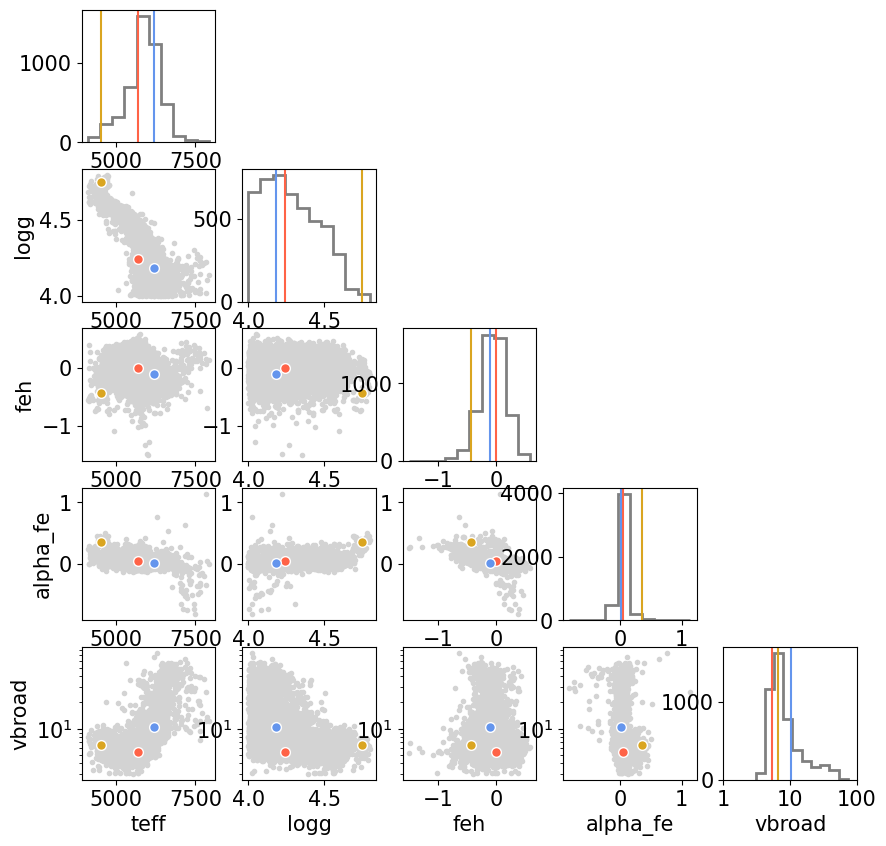

In [5]:
figure(figsize=(10,10))
subplot(5,5,1)
hist(training_set.galah_teff, histtype='step', color='grey', lw=2)
axvline(teff1, color=c1)
axvline(teff2, color=c2)
axvline(teff3, color=c3)

subplot(5,5,6);ylabel('logg')
plot(training_set.galah_teff, training_set.galah_logg, '.', color='lightgrey')
plot(teff1, logg1, color=c1, mec='w', ms=7, marker='o')
plot(teff2, logg2, color=c2, mec='w', ms=7, marker='o')
plot(teff3, logg3, color=c3, mec='w', ms=7, marker='o')

subplot(5,5,7)
hist(training_set.galah_logg, histtype='step', color='grey', lw=2)
axvline(logg1, color='tomato')
axvline(logg2, color='goldenrod')
axvline(logg3, color='cornflowerblue')

subplot(5,5,11);ylabel('feh')
plot(training_set.galah_teff, training_set.galah_feh, '.', color='lightgrey')
plot(teff1, feh1, color=c1, mec='w', ms=7, marker='o')
plot(teff2, feh2, color=c2, mec='w', ms=7, marker='o')
plot(teff3, feh3, color=c3, mec='w', ms=7, marker='o')

subplot(5,5,12)
plot(training_set.galah_logg, training_set.galah_feh, '.', color='lightgrey')
plot(logg1, feh1, color=c1, mec='w', ms=7, marker='o')
plot(logg2, feh2, color=c2, mec='w', ms=7, marker='o')
plot(logg3, feh3, color=c3, mec='w', ms=7, marker='o')

subplot(5,5,13);xlabel('feh')
hist(training_set.galah_feh, histtype='step', color='grey', lw=2)
axvline(feh1, color='tomato')
axvline(feh2, color='goldenrod')
axvline(feh3, color='cornflowerblue')

subplot(5,5,16);ylabel('alpha_fe')
plot(training_set.galah_teff, training_set.galah_alpha, '.', color='lightgrey')
plot(teff1, alpha_fe1, color=c1, mec='w', ms=7, marker='o')
plot(teff2, alpha_fe2, color=c2, mec='w', ms=7, marker='o')
plot(teff3, alpha_fe3, color=c3, mec='w', ms=7, marker='o')

subplot(5,5,17)
plot(training_set.galah_logg, training_set.galah_alpha, '.', color='lightgrey')
plot(logg1, alpha_fe1, color=c1, mec='w', ms=7, marker='o')
plot(logg2, alpha_fe2, color=c2, mec='w', ms=7, marker='o')
plot(logg3, alpha_fe3, color=c3, mec='w', ms=7, marker='o')

subplot(5,5,18)
plot(training_set.galah_feh, training_set.galah_alpha, '.', color='lightgrey')
plot(feh1, alpha_fe1, color=c1, mec='w', ms=7, marker='o')
plot(feh2, alpha_fe2, color=c2, mec='w', ms=7, marker='o')
plot(feh3, alpha_fe3, color=c3, mec='w', ms=7, marker='o')

subplot(5,5,19);xlabel('alpha_fe')
hist(training_set.galah_alpha, histtype='step', color='grey', lw=2)
axvline(alpha_fe1, color='tomato')
axvline(alpha_fe2, color='goldenrod')
axvline(alpha_fe3, color='cornflowerblue')

subplot(5,5,21);ylabel('vbroad');xlabel('teff');yscale('log')
plot(training_set.galah_teff, training_set.galah_vbroad, '.', color='lightgrey')
plot(teff1, vbroad1, color=c1, mec='w', ms=7, marker='o')
plot(teff2, vbroad2, color=c2, mec='w', ms=7, marker='o')
plot(teff3, vbroad3, color=c3, mec='w', ms=7, marker='o')

subplot(5,5,22);xlabel('logg');yscale('log')
plot(training_set.galah_logg, training_set.galah_vbroad, '.', color='lightgrey')
plot(logg1, vbroad1, color=c1, mec='w', ms=7, marker='o')
plot(logg2, vbroad2, color=c2, mec='w', ms=7, marker='o')
plot(logg3, vbroad3, color=c3, mec='w', ms=7, marker='o')

subplot(5,5,23);xlabel('feh');yscale('log')
plot(training_set.galah_feh, training_set.galah_vbroad, '.', color='lightgrey')
plot(feh1, vbroad1, color=c1, mec='w', ms=7, marker='o')
plot(feh2, vbroad2, color=c2, mec='w', ms=7, marker='o')
plot(feh3, vbroad3, color=c3, mec='w', ms=7, marker='o')

subplot(5,5,24);xlabel('alpha_fe');yscale('log')
plot(training_set.galah_alpha, training_set.galah_vbroad, '.', color='lightgrey')
plot(alpha_fe1, vbroad1, color=c1, mec='w', ms=7, marker='o')
plot(alpha_fe2, vbroad2, color=c2, mec='w', ms=7, marker='o')
plot(alpha_fe3, vbroad3, color=c3, mec='w', ms=7, marker='o')

subplot(5,5,25);xlabel('vbroad')
hist(np.log10(training_set.galah_vbroad), histtype='step', color='grey', lw=2)
axvline(np.log10(vbroad1), color='tomato')
axvline(np.log10(vbroad2), color='goldenrod')
axvline(np.log10(vbroad3), color='cornflowerblue')
xticks(ticks=[0,1,2], labels=['1','10','100'])

Text(0, 0.5, 'normalized flux')

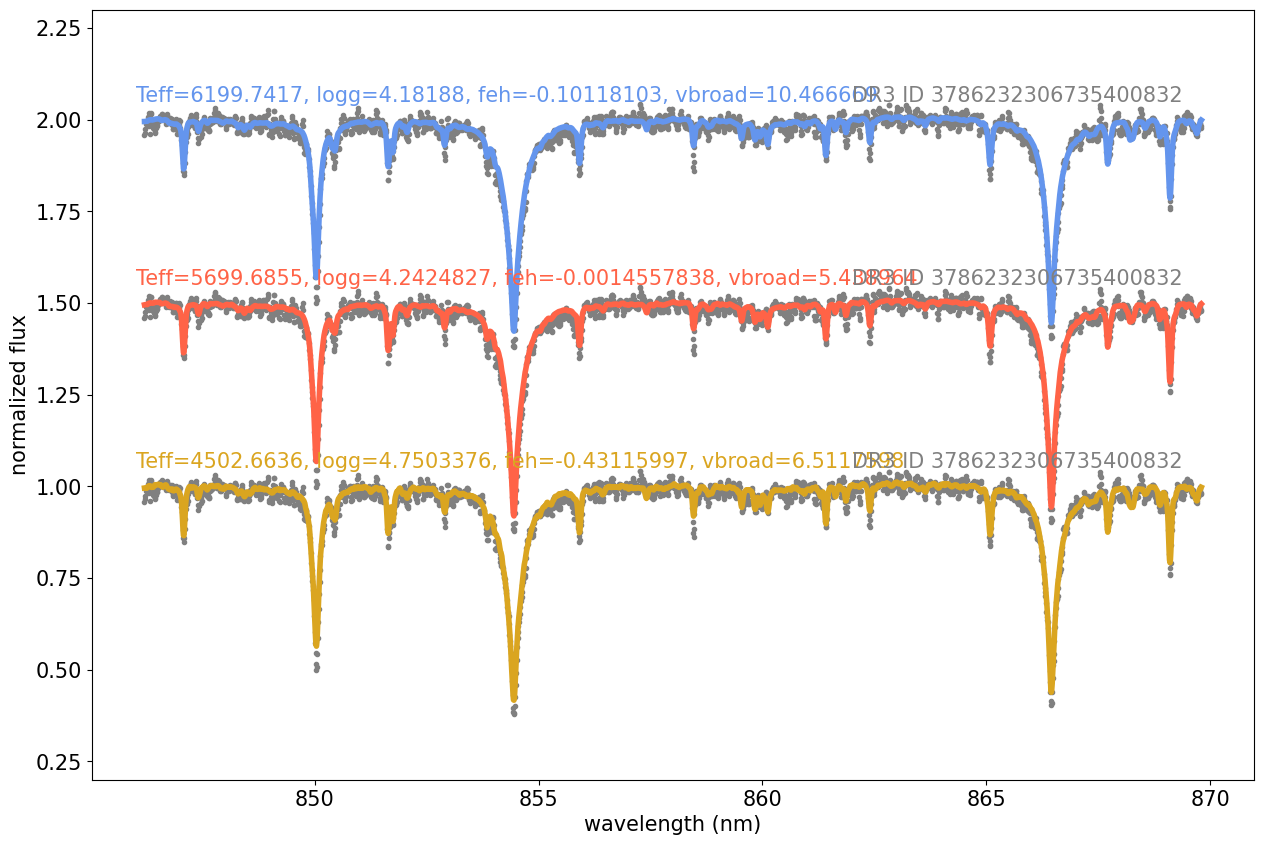

In [6]:
flux_data = pd.read_csv('./data/gaia_rvs_dataframes/training_flux.csv')
flux_err_data = pd.read_csv('./data/gaia_rvs_dataframes/training_sigma.csv')
id1 = str(row1.source_id)
flux1 = flux_data[id1].to_numpy()
sigma1 = flux_err_data[id1].to_numpy()

id2 = str(row1.source_id)
flux2 = flux_data[id2].to_numpy()

id3 = str(row1.source_id)
flux3 = flux_data[id3].to_numpy()

rcParams['font.size']=15
str1 = 'Teff={}, logg={}, feh={}, vbroad={}'.format(teff1, logg1, feh1, vbroad1)
str2 = 'Teff={}, logg={}, feh={}, vbroad={}'.format(teff2, logg2, feh2, vbroad2)
str3 = 'Teff={}, logg={}, feh={}, vbroad={}'.format(teff3, logg3, feh3, vbroad3)

figure(figsize=(15,10))
plot(w, flux2[20:-20], '.', color='grey')
plot(w, model([teff2, logg2, feh2, alpha_fe2, vbroad2]), color=c2, lw=4)
plt.text(846,1.05,str2, color=c2)
text(862,1.05,'DR3 ID '+id2, color='grey')

plot(w, flux1[20:-20]+0.5, '.', color='grey')
plot(w, model([teff1, logg1, feh1, alpha_fe1, vbroad1])+0.5, color=c1, lw=4)
plt.text(846,1.55,str1, color=c1)
text(862,1.55,'DR3 ID '+id1, color='grey')

plot(w, flux3[20:-20]+1.0, '.', color='grey')
plot(w, model([teff3, logg3, feh3, alpha_fe3, vbroad3])+1.0, color=c3, lw=4)
plt.text(846,2.05,str3, color=c3)
text(862,2.05,'DR3 ID '+id3, color='grey')

ylim(0.2,2.3)
xlabel('wavelength (nm)')
ylabel('normalized flux')

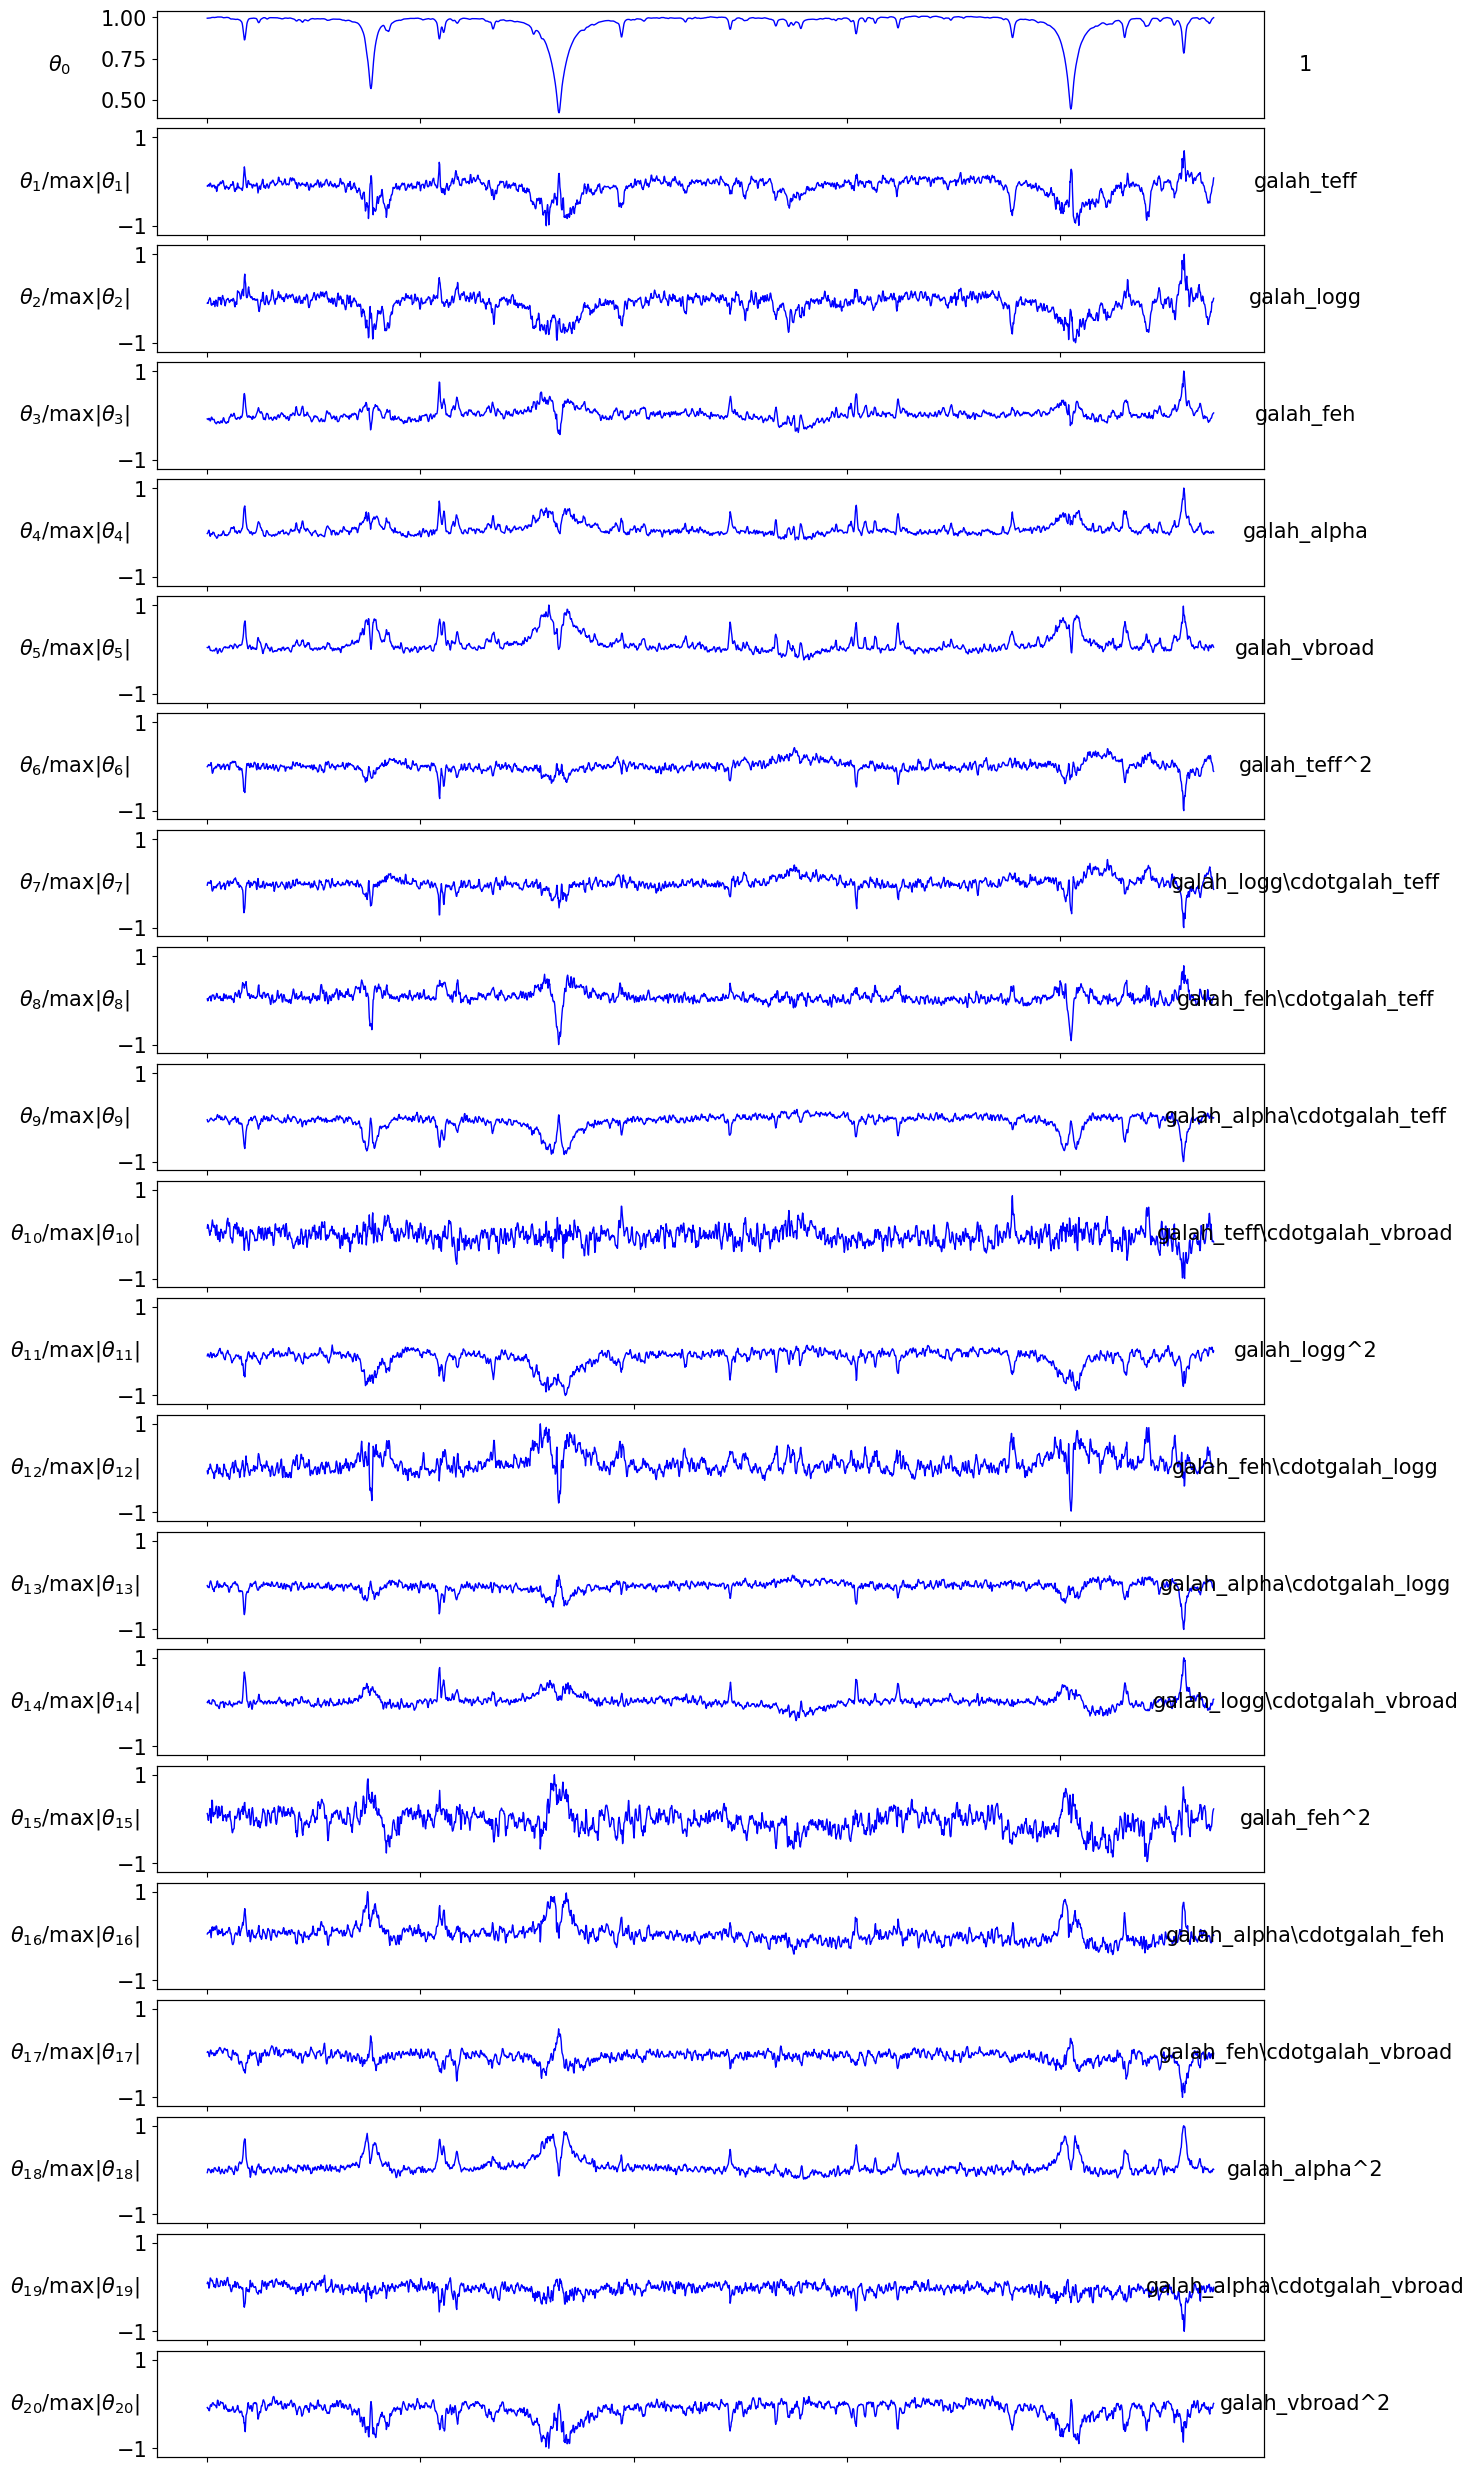

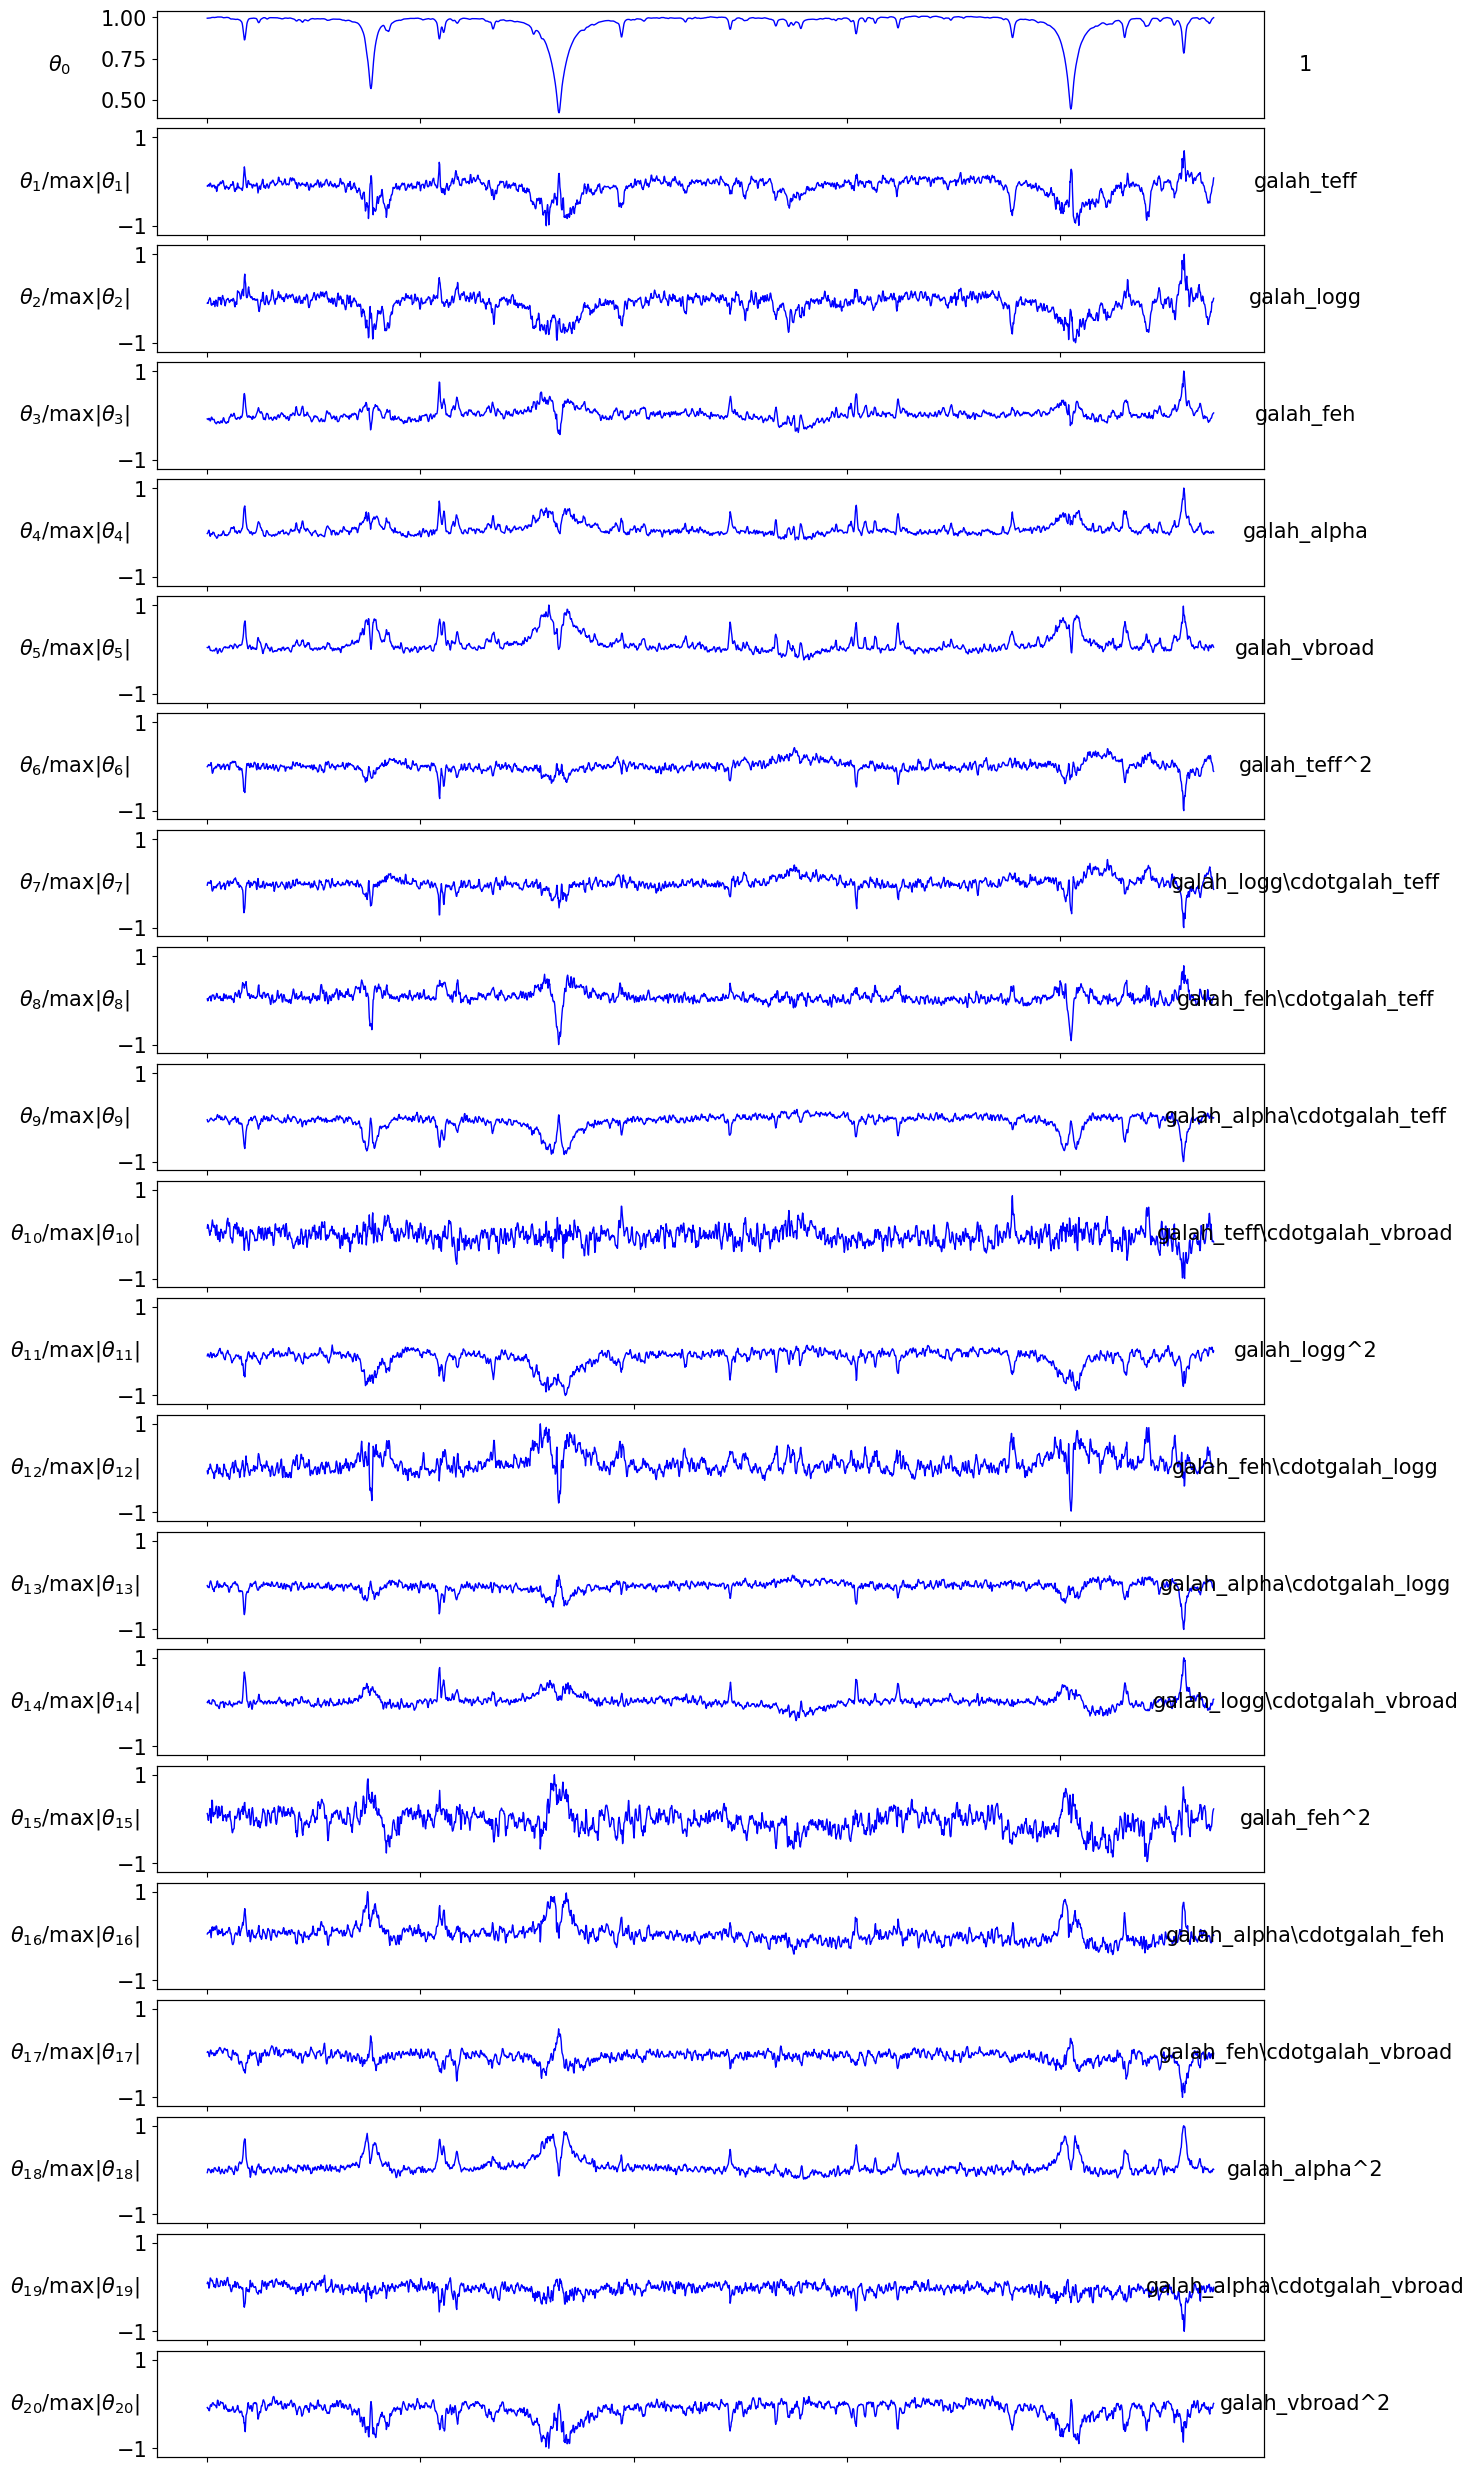

In [7]:
# next I need to make the coefficient plot
import thecannon as tc
model = tc.CannonModel.read('./data/cannon_models/galah_labels_5para_highSNR_cleaned_v2.model')
tc.plot.theta(model)

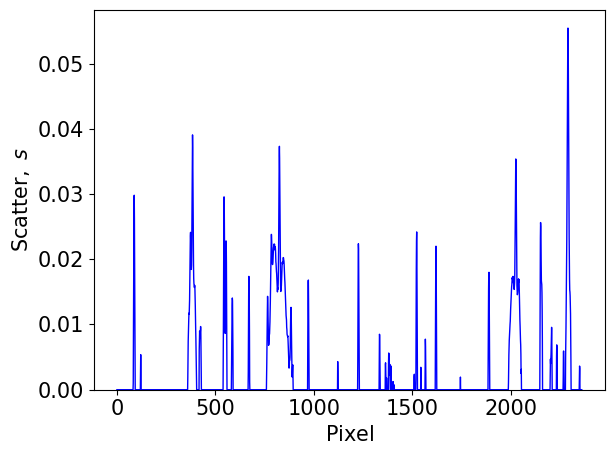

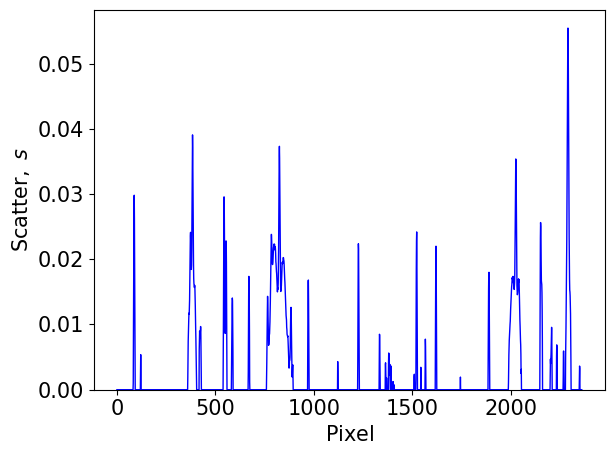

In [8]:
tc.plot.scatter(model)